## Introduction

<p style='text-align: justify;'>Heavy metals such as copper, zinc and selenium can be found in the foods and beverages, that are essential to specific human bodily functions, which suggests that one’s diet or lifestyle can greatly impact a person's physiologicla and mental state (Anthony, 2018). According to Islam et al. (2020), altered serum levels of macro-minerals and trace elements have been recognized as major causative factors to the pathogenesis of many mental disorders, like major depressive disorder. It was reported that patients with major depressive disorder had lower concentrations of calcium, magnesium, iron, manganese, selenium, and zinc; these patients had higher concentrations of copper than the control group of the study. 

<p style='text-align: justify;'>The data used in our analysis was gathered from the National Health and Nutrition Examination Survey (NHANES) 2015-2016 conducted through the Centers for Disease Control and Prevention. From the dataset we extracted laboratory data on the different concentrations of heavy metal serums (copper, selenium, and zinc) as well as questionnaire data about the presence of depression (based on different variables of measurement) in sample population that is supposed to represent the overall US demographic. Our analysis explores the relationship between serum copper, selenium and zinc concentrations (microgram per deciliter) and the presence/absence of depression (based on three variables: hopelessness, suidical thoughts, and anhedonia) in the studied sample population. <p style='text-align: justify;'>The hypothesis that were explored:<br><br>
•	Null hypothesis: no significant difference of serum heavy metal concentrations between depressed and non-depressed subjects<br>
•	Alternative hypothesis 1: significant difference of serum heavy metal concentrations between depressed and non-depressed subjects<br>
•	Alternative hypothesis 2: cofounding variables such as gender, ethnicity and age can affect the correlation between serum heavy metal concentrations and the presence/absence of depression<br> 

<p style='text-align: justify;'>Based on our analysis, it was concluded that the study failed to reject the null hypothesis which means that there is no significant difference of serum heavy metal concentrations in subjects who do experience depression and don't. Gender, ethnicity and age also do not have any significant influence on the serum heavy metal concentrations in depressed and non-depressed subjects. Overall concentrations of zinc were the lowest out of the three serum heavy metal concentrations of interest. A very small amount of subjects in the sample population were considered depressed, and even a smaller amount of subjects actually experience all three variables of depression that were of interest in the study. No Asians presented a depression score higher than two (no Asians experienced all three depression variables).</p>

## Importing and Cleaning the Data

<p style='text-align: justify;'>Importation of the folowing libraries: pandas to analyze and clean the dataset, of numpy to realize some mathematical functions, of matplotlib to create some plots, of xlrd to read excel files and of altair to create some interactive visualizations.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import altair as alt

Read the excel file that contains our dataset of interest as a dataframe named "hm."

In [2]:
hm=pd.read_excel('NHANES_Chris (2).xlsx')
hm

,seqn,riagendr,ridageyr,ridreth1,ridreth3,dpq010,dpq020,dpq030,dpq040,dpq050,...,dpq070,dpq080,dpq090,dpq100,lbxscu,lbdscusi,lbxsse,lbdssesi,lbxszn,lbdsznsi
0,83732,1,62,3,3,0,0,0,1,0,...,0,0,0,0,87.8,13.78,141.1,1.79,88.5,13.54
1,83733,1,53,3,3,1,0,0,0,1,...,0,0,0,0,100.7,15.81,130.4,1.66,100.6,15.39
2,83734,1,78,3,3,0,0,0,1,0,...,0,0,0,1,123.0,19.31,126.4,1.61,98.7,15.10
3,83741,1,22,4,4,0,0,0,1,0,...,0,0,0,0,92.6,14.54,119.9,1.52,86.2,13.19
4,83747,1,46,3,3,0,0,2,0,0,...,0,0,0,0,120.0,18.84,129.9,1.65,68.4,10.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,93659,1,62,1,1,3,0,1,2,1,...,0,0,0,0,104.1,16.34,130.9,1.66,78.4,12.00
1125,93668,2,73,1,1,3,3,2,3,0,...,0,3,0,2,148.1,23.25,145.1,1.84,64.3,9.84
1126,93670,1,32,3,3,0,0,0,2,1,...,0,0,0,0,121.8,19.12,151.6,1.93,64.0,9.79
1127,93679,2,72,4,4,0,1,0,0,0,...,2,0,0,0,136.5,21.43,150.1,1.91,74.4,11.38


<p style='text-align: justify;'>Because the dataset was taken from a larger scale study, many columns that were not of interest to our study were dropped such as columns that did not acknowledge certain ethnicities or other variables of derpression assessment that for our study were not relevant enough to measure depression (according to certain DSM-5 criteria symptoms), and columns of heavy metal concetrations that were measured in a different unit of measurement which was considered as excessive and unnecessary data for our study.</p>

In [3]:
cols_interest=hm.drop(['ridreth1','dpq030','dpq040','dpq050','dpq060',
        'dpq070','dpq080','dpq100','lbdscusi','lbdssesi','lbdsznsi'],axis=1)
cols_interest

,seqn,riagendr,ridageyr,ridreth3,dpq010,dpq020,dpq090,lbxscu,lbxsse,lbxszn
0,83732,1,62,3,0,0,0,87.8,141.1,88.5
1,83733,1,53,3,1,0,0,100.7,130.4,100.6
2,83734,1,78,3,0,0,0,123.0,126.4,98.7
3,83741,1,22,4,0,0,0,92.6,119.9,86.2
4,83747,1,46,3,0,0,0,120.0,129.9,68.4
...,...,...,...,...,...,...,...,...,...,...
1124,93659,1,62,1,3,0,0,104.1,130.9,78.4
1125,93668,2,73,1,3,3,0,148.1,145.1,64.3
1126,93670,1,32,3,0,0,0,121.8,151.6,64.0
1127,93679,2,72,4,0,1,0,136.5,150.1,74.4


<p style='text-align: justify;'>For the three depression variables in the "dpq" columns, we replace the values 2, 3, 0, 1, 7 and 9 with values of zeros and ones to simplify our findings.  In the study, responses of 2 and 3 meant that the subject experienced the depression variable more than half the days or nearly every day. For the purpose of our work, these were assigned a value of 1 (which signified the subject's acceptance of experiencing any of the depression variables). Responses of 0, 1, 7 and 9 meant the subject responded "not at all", "several days", "refused" or "don't know." These were assigned a value of 0 (which signified that the subject that the subject was not experiencing any of the particular depression variables).

Data in the gender and ethnicity columns were changed from numerical codes to text descriptions. Likewise, in input 5, columns are re-named from codes to descriptors that are related to our study. This allows users to easily understand the data without the need of a code book and that the presentation of the data is straightforward.</p>

In [4]:
cols_interest['dpq010'] = cols_interest.dpq010.replace([2, 3, 0, 1, 7,9], [1, 1, 0, 0, 0, 0])
cols_interest['dpq020'] = cols_interest.dpq020.replace([2, 3, 0, 1, 7,9], [1, 1, 0, 0, 0, 0])
cols_interest['dpq090'] = cols_interest.dpq090.replace([2, 3, 0, 1, 7,9], [1, 1, 0, 0, 0, 0])
cols_interest.replace({'riagendr': {1:'M', 2:'F'}}, inplace=True)
cols_interest.replace({'ridreth3': {1:'Hispanic', 2:'Hispanic', 3:'Caucasian', 4:'African American', 6:'Asian'}}, inplace=True)

In [5]:
cols_interest.rename(columns={'seqn':'Subject','riagendr':'Gender', 'ridageyr':'Age','ridreth3':'Ethnicity',
                              'dpq010':'Anhedonia','dpq020':'Hopelessness','dpq090':'Suicidal Thoughts',
                              'lbxscu':'Serum Cu','lbxsse':'Serum Se','lbxszn':'Serum Zn'}, inplace=True)

<p style='text-align: justify;'>Bins are created to sort  age values by age (in years) which were then used to sort subjects into distinct age groups (that were of interest in our study) that was added as a new column for this dataframe. Purpose of the crude age ranges reflect on the major stages of adulthood and aging and to aovid any individual analysis of the 75 and more unique ages of the subjects that participated in this study.</p>

In [6]:
cols_interest.sort_values(by=['Age'], inplace=True)
cols_interest["agebins"] = pd.cut(x=cols_interest['Age'], bins=[17,34, 54, 74, 110])
cols_interest['agebins'].unique()

[(17, 34], (34, 54], (54, 74], (74, 110]]
Categories (4, interval[int64]): [(17, 34] < (34, 54] < (54, 74] < (74, 110]]

In [7]:
cols_interest["Age Group"] =pd.cut(x=hm['ridageyr'], bins=[17,34, 54, 74, 110], labels=['18-34', '35-54', '55-74', '75+'])
cols_interest.reset_index(drop=True, inplace=True)
del cols_interest['agebins']
cols_interest

,Subject,Gender,Age,Ethnicity,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn,Age Group
0,90351,M,18,Hispanic,0,0,0,117.1,162.3,92.3,18-34
1,86311,F,18,Hispanic,0,0,0,118.8,140.1,87.7,18-34
2,92433,F,18,Hispanic,0,0,0,133.0,115.9,65.7,18-34
3,84391,M,18,Caucasian,0,0,0,76.4,145.9,101.4,18-34
4,90504,F,18,African American,0,1,0,132.1,124.7,88.4,18-34
...,...,...,...,...,...,...,...,...,...,...,...
1124,91551,F,80,Caucasian,0,0,0,81.2,58.1,31.4,75+
1125,91558,M,80,Caucasian,0,0,0,114.6,146.7,103.8,75+
1126,84691,F,80,Hispanic,0,0,0,128.5,136.8,78.5,75+
1127,91476,F,80,Caucasian,0,0,0,137.2,129.9,88.2,75+


<p style='text-align: justify;'>Any multi-racial subjects (denoted by a code value of 7) were dropped from the dataframe since this type of ethnicity was not an ethnicity of interest in our study.</p>

In [8]:
cols_interest = cols_interest.drop(cols_interest[cols_interest['Ethnicity']==7].index)
cols_interest

,Subject,Gender,Age,Ethnicity,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn,Age Group
0,90351,M,18,Hispanic,0,0,0,117.1,162.3,92.3,18-34
1,86311,F,18,Hispanic,0,0,0,118.8,140.1,87.7,18-34
2,92433,F,18,Hispanic,0,0,0,133.0,115.9,65.7,18-34
3,84391,M,18,Caucasian,0,0,0,76.4,145.9,101.4,18-34
4,90504,F,18,African American,0,1,0,132.1,124.7,88.4,18-34
...,...,...,...,...,...,...,...,...,...,...,...
1124,91551,F,80,Caucasian,0,0,0,81.2,58.1,31.4,75+
1125,91558,M,80,Caucasian,0,0,0,114.6,146.7,103.8,75+
1126,84691,F,80,Hispanic,0,0,0,128.5,136.8,78.5,75+
1127,91476,F,80,Caucasian,0,0,0,137.2,129.9,88.2,75+


<p style='text-align: justify;'>Subjects are assigned a score based on the number of depression variables they exhibit. The score column the addition of the values of the three depression variable columns: Anhedonia, Hopelessness and Suicidal Thoughts, which is added to the dataframe as a new column. The depression scores will be used later to classify what level of depression the subject has experienced and whether they are categorized as depressed or non-depressed.</p>

In [9]:
cols_interest['Score'] = cols_interest['Hopelessness']+cols_interest['Anhedonia']+cols_interest['Suicidal Thoughts']
cols_interest.sort_values(by='Score')

,Subject,Gender,Age,Ethnicity,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn,Age Group,Score
0,90351,M,18,Hispanic,0,0,0,117.1,162.3,92.3,18-34,0
695,86319,F,55,Caucasian,0,0,0,114.3,92.1,65.4,55-74,0
696,84561,F,55,Caucasian,0,0,0,122.0,138.3,87.0,55-74,0
698,88641,F,55,Asian,0,0,0,109.0,120.9,72.6,55-74,0
701,87199,M,55,Hispanic,0,0,0,110.7,140.8,64.9,55-74,0
...,...,...,...,...,...,...,...,...,...,...,...,...
622,92109,M,50,Caucasian,1,1,1,97.6,142.6,102.8,35-54,3
935,86276,M,68,Hispanic,1,1,1,101.7,126.0,83.8,55-74,3
319,90062,F,34,African American,1,1,1,123.6,137.1,75.3,18-34,3
806,89572,F,61,African American,1,1,1,182.8,192.2,99.0,55-74,3


## Creating functions

Functions were defined to calculate standard deviation per age group and ethnicity for the three metal serums: Copper (Cu), Selenium (Se), and Zinc (Zn).

In [10]:
def addStd_age(total, method):
    total = total.assign(Cu_std = [method.loc['18-34']['Serum Cu']['std'],
                                 method.loc['35-54']['Serum Cu']['std'], 
                                 method.loc['55-74']['Serum Cu']['std'],
                                 method.loc['75+']['Serum Cu']['std']])

    total = total.assign(Se_std = [method.loc['18-34']['Serum Se']['std'],
                                 method.loc['35-54']['Serum Se']['std'], 
                                 method.loc['55-74']['Serum Se']['std'],
                                 method.loc['75+']['Serum Se']['std']])

    total = total.assign(Zn_std = [method.loc['18-34']['Serum Zn']['std'],
                                 method.loc['35-54']['Serum Zn']['std'], 
                                 method.loc['55-74']['Serum Zn']['std'],
                                 method.loc['75+']['Serum Zn']['std']])

    return total

In [11]:
def addStd_race(total, method):
    try:
        total = total.assign(Cu_std = [method.loc['African American']['Serum Cu']['std'],
                                 method.loc['Asian']['Serum Cu']['std'], 
                                 method.loc['Caucasian']['Serum Cu']['std'],
                                 method.loc['Hispanic']['Serum Cu']['std']])

        total = total.assign(Se_std = [method.loc['African American']['Serum Se']['std'],
                                 method.loc['Asian']['Serum Se']['std'], 
                                 method.loc['Caucasian']['Serum Se']['std'],
                                 method.loc['Hispanic']['Serum Se']['std']])

        total = total.assign(Zn_std = [method.loc['African American']['Serum Zn']['std'],
                                 method.loc['Asian']['Serum Zn']['std'], 
                                 method.loc['Caucasian']['Serum Zn']['std'],
                                 method.loc['Hispanic']['Serum Zn']['std']])
    except KeyError:
        total = total.assign(Cu_std = [method.loc['African American']['Serum Cu']['std'],
                                 method.loc['Caucasian']['Serum Cu']['std'],
                                 method.loc['Hispanic']['Serum Cu']['std']])

        total = total.assign(Se_std = [method.loc['African American']['Serum Se']['std'],
                                 method.loc['Caucasian']['Serum Se']['std'],
                                 method.loc['Hispanic']['Serum Se']['std']])

        total = total.assign(Zn_std = [method.loc['African American']['Serum Zn']['std'],
                                 method.loc['Caucasian']['Serum Zn']['std'],
                                 method.loc['Hispanic']['Serum Zn']['std']])

    return total

## Analysis Dataframes

<p style='text-align: justify;'>For the purpose of our analysis, we decided that subjects with a score of two or three would be considered depressed. Those subjects with a score of zero or one are not depressed. A "Depressed" column is added to show "Yes" and "No" values based on our criteria in two separate dataframes. These dataframes are combined into a new dataframe: d_t.</p>

In [12]:
dep_y=cols_interest.loc[cols_interest['Score'] > 1]
dep_y['Depressed'] = 'Yes'
dep_y.sort_values(by='Score')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Subject,Gender,Age,Ethnicity,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn,Age Group,Score,Depressed
31,87571,F,19,African American,1,1,0,109.0,114.7,89.9,18-34,2,Yes
638,88664,M,51,Asian,0,1,1,116.9,163.0,77.7,35-54,2,Yes
1093,84695,M,80,Hispanic,1,1,0,89.9,144.7,70.7,75+,2,Yes
699,88804,M,55,Caucasian,1,1,0,95.7,145.3,55.1,55-74,2,Yes
702,85288,F,55,Caucasian,1,1,0,162.7,102.2,65.7,55-74,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,89978,F,64,Hispanic,1,1,1,80.5,137.5,69.7,55-74,3,Yes
622,92109,M,50,Caucasian,1,1,1,97.6,142.6,102.8,35-54,3,Yes
806,89572,F,61,African American,1,1,1,182.8,192.2,99.0,55-74,3,Yes
454,88351,F,41,Caucasian,1,1,1,175.5,136.3,99.5,35-54,3,Yes


In [13]:
dep_n=cols_interest.loc[cols_interest['Score'] < 2]
dep_n['Depressed'] = 'No'
dep_n.sort_values(by='Score')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Subject,Gender,Age,Ethnicity,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn,Age Group,Score,Depressed
0,90351,M,18,Hispanic,0,0,0,117.1,162.3,92.3,18-34,0,No
707,92872,F,55,Hispanic,0,0,0,94.6,133.5,71.3,55-74,0,No
709,89402,F,55,Hispanic,0,0,0,144.4,148.0,79.0,55-74,0,No
710,86338,M,55,Hispanic,0,0,0,86.8,134.9,66.1,55-74,0,No
712,92500,F,56,Asian,0,0,0,104.2,126.9,110.2,55-74,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,88916,F,70,African American,1,0,0,121.6,122.2,88.8,55-74,1,No
968,85061,M,70,Asian,0,1,0,129.4,127.2,106.5,55-74,1,No
145,86551,M,25,African American,1,0,0,138.3,132.1,82.5,18-34,1,No
951,86664,M,69,African American,1,0,0,113.8,131.5,74.7,55-74,1,No


In [14]:
d_t=dep_y.append(dep_n)
d_t

,Subject,Gender,Age,Ethnicity,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn,Age Group,Score,Depressed
31,87571,F,19,African American,1,1,0,109.0,114.7,89.9,18-34,2,Yes
48,83919,M,19,Hispanic,1,1,0,103.7,144.4,90.9,18-34,2,Yes
59,85631,F,20,Hispanic,1,1,0,88.7,130.7,87.9,18-34,2,Yes
67,92695,F,21,African American,1,1,0,195.9,115.0,73.2,18-34,2,Yes
82,88540,F,22,Caucasian,1,1,0,115.1,120.0,76.1,18-34,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,91551,F,80,Caucasian,0,0,0,81.2,58.1,31.4,75+,0,No
1125,91558,M,80,Caucasian,0,0,0,114.6,146.7,103.8,75+,0,No
1126,84691,F,80,Hispanic,0,0,0,128.5,136.8,78.5,75+,0,No
1127,91476,F,80,Caucasian,0,0,0,137.2,129.9,88.2,75+,0,No


In [15]:
d_t.to_excel("DEPSerum.xlsx") 

We used the describe method to gather standard deviation (std) for both depressed and non-depressed groups by gender.

In [16]:
no_des = dep_n.groupby('Gender').describe()
yes_des = dep_y.groupby('Gender').describe()

yes_des

Subject                                                        \
         count          mean          std      min      25%      50%   
Gender                                                                 
F         39.0  89097.974359  2624.027865  83869.0  87536.0  88729.0   
M         36.0  87424.833333  2885.624533  83919.0  85159.0  86623.5   

                            Age             ... Serum Zn        Score  \
             75%      max count       mean  ...      75%    max count   
Gender                                      ...                         
F       91197.00  93668.0  39.0  48.974359  ...   88.900  108.6  39.0   
M       90113.75  93183.0  36.0  52.666667  ...   89.075  104.4  36.0   

                                                     
            mean       std  min  25%  50%  75%  max  
Gender                                               
F       2.307692  0.467572  2.0  2.0  2.0  3.0  3.0  
M       2.083333  0.280306  2.0  2.0  2.0  2.0  3.0  

[2 rows x 72 columns]

In [17]:
no_des

Subject                                                                 \
         count          mean          std      min      25%      50%      75%   
Gender                                                                          
F        545.0  88657.091743  2845.168630  83757.0  86093.0  88684.0  91112.0   
M        465.0  88717.094624  2828.020444  83732.0  86284.0  88678.0  91095.0   

                   Age             ... Serum Zn         Score            \
            max  count       mean  ...      75%    max  count      mean   
Gender                             ...                                    
F       93679.0  545.0  47.502752  ...     88.6  136.7  545.0  0.113761   
M       93684.0  465.0  48.365591  ...     92.8  139.1  465.0  0.133333   

                                           
             std  min  25%  50%  75%  max  
Gender                                     
F       0.317813  0.0  0.0  0.0  0.0  1.0  
M       0.340301  0.0  0.0  0.0  0.0  1.0  

[2 rows x 72 columns]

Using the groupby function, dataframes were created to show the means of depressed vs. non-depressed males and females. Extra columns were dropped for readability in the dataframe named 'd_tg'.

In [18]:
d_tg = d_t.groupby(['Depressed', 'Gender']).mean()
d_tg.drop(['Subject', 'Age', 'Anhedonia', 'Hopelessness', 'Suicidal Thoughts', 'Score'], axis=1, inplace=True)
d_tg

Serum Cu    Serum Se   Serum Zn
Depressed Gender                                   
No        F       132.315229  125.434679  78.938165
          M       107.249032  131.013548  82.365591
Yes       F       135.982051  127.758974  79.817949
          M       114.772222  134.822222  80.172222

Standard deviations (std) and coefficients of variation (cv) are added to the gender (d_tg) dataframe. We created the std column in order to calculate the cv column. The cv shows how reliable the data is:<br><ul><li>Below 10% is very reliable<br><li>Between 10%-20% is good<br><li>Between 20%-30% is acceptable<br><li>Over 30% is not reliable</ul>

In [19]:
d_tg = d_tg.assign(Cu_std = [no_des.loc['F']['Serum Cu']['std'],
                                 no_des.loc['M']['Serum Cu']['std'], 
                                 yes_des.loc['F']['Serum Cu']['std'],
                                 yes_des.loc['M']['Serum Cu']['std']])
                                 
d_tg = d_tg.assign(Se_std = [no_des.loc['F']['Serum Se']['std'],
                                 no_des.loc['M']['Serum Se']['std'], 
                                 yes_des.loc['F']['Serum Se']['std'],
                                 yes_des.loc['M']['Serum Se']['std']]) 

d_tg = d_tg.assign(Zn_std = [no_des.loc['F']['Serum Zn']['std'],
                                 no_des.loc['M']['Serum Zn']['std'], 
                                 yes_des.loc['F']['Serum Zn']['std'],
                                 yes_des.loc['M']['Serum Zn']['std']])

d_tg['Subjects'] = np.array(no_des.loc[:]['Subject']['count'].append(yes_des.loc[:]['Subject']['count']))
                                 
d_tg['CV Cu']=np.where(0,0,100*(d_tg['Cu_std']/d_tg['Serum Cu']))
d_tg['CV Se']=np.where(0,0,100*(d_tg['Se_std']/d_tg['Serum Se']))
d_tg['CV Zn']=np.where(0,0,100*(d_tg['Zn_std']/d_tg['Serum Zn']))
d_tg=d_tg.round(2)
d_tg

Serum Cu  Serum Se  Serum Zn  Cu_std  Se_std  Zn_std  \
Depressed Gender                                                         
No        F         132.32    125.43     78.94   35.01   16.07   14.58   
          M         107.25    131.01     82.37   21.23   16.51   15.25   
Yes       F         135.98    127.76     79.82   28.70   20.23   12.38   
          M         114.77    134.82     80.17   17.87   20.03   12.99   

                  Subjects  CV Cu  CV Se  CV Zn  
Depressed Gender                                 
No        F          545.0  26.46  12.81  18.47  
          M          465.0  19.80  12.61  18.51  
Yes       F           39.0  21.11  15.84  15.51  
          M           36.0  15.57  14.85  16.21

<p style='text-align: justify;'>Next, we create dataframes for Age Group and then Ethnicity that display the standard deviation and coefficient of variation values, so we will be able to compare all the cofounding variables by the same factors.</p>

In [20]:
no_des = dep_n.groupby('Age Group').describe()
yes_des = dep_y.groupby('Age Group').describe()

yes_des

Subject                                                         \
            count          mean          std      min       25%      50%   
Age Group                                                                  
18-34        18.0  88149.277778  3063.195271  83919.0  85894.50  87888.0   
35-54        20.0  88113.950000  2358.214366  84241.0  86504.75  87900.5   
55-74        33.0  88378.909091  3105.183674  83869.0  85536.00  88729.0   
75+           4.0  89161.250000  3027.457500  84695.0  88715.00  90286.5   

                               Age             ... Serum Zn        Score  \
                75%      max count       mean  ...      75%    max count   
Age Group                                      ...                         
18-34      89681.50  93261.0  18.0  25.944444  ...   90.125  105.2  18.0   
35-54      90395.25  92353.0  20.0  46.350000  ...   87.175  104.4  20.0   
55-74      91469.00  93668.0  33.0  63.484848  ...   83.700   99.0  33.0   
75+        90732.75  91377.0   4.0  79.250000  ...   98.700  108.6   4.0   

                                                         
               mean       std  min  25%  50%   75%  max  
Age Group                                                
18-34      2.111111  0.323381  2.0  2.0  2.0  2.00  3.0  
35-54      2.300000  0.470162  2.0  2.0  2.0  3.00  3.0  
55-74      2.181818  0.391675  2.0  2.0  2.0  2.00  3.0  
75+        2.250000  0.500000  2.0  2.0  2.0  2.25  3.0  

[4 rows x 72 columns]

In [21]:
d_nage = dep_n.groupby(['Depressed', 'Age Group']).mean()
d_nage = addStd_age(d_nage, no_des)
d_nage['Subjects'] = np.array(no_des.loc[:]['Subject']['count'])
d_yage = dep_y.groupby(['Depressed', 'Age Group']).mean()
d_yage = addStd_age(d_yage, yes_des)
d_yage['Subjects'] = np.array(yes_des.loc[:]['Subject']['count'])

d_tage = d_yage.append(d_nage)
d_tage.drop(['Subject', 'Age', 'Anhedonia', 'Hopelessness', 'Suicidal Thoughts', 'Score'], axis=1, inplace=True)
#d_tage=d_tage.round(2)
d_tage['CV Cu']=np.where(0,0,100*(d_tage['Cu_std']/d_tage['Serum Cu']))
d_tage['CV Se']=np.where(0,0,100*(d_tage['Se_std']/d_tage['Serum Se']))
d_tage['CV Zn']=np.where(0,0,100*(d_tage['Zn_std']/d_tage['Serum Zn']))

d_tage=d_tage.round(2)
d_tage

Serum Cu  Serum Se  Serum Zn  Cu_std  Se_std  Zn_std  \
Depressed Age Group                                                         
Yes       18-34        128.53    130.41     80.76   33.39   22.39   12.88   
          35-54        128.28    131.12     82.58   24.08   20.91   11.99   
          55-74        125.01    131.69     77.48   23.91   19.88   11.68   
          75+          107.68    130.12     84.20   18.68   18.41   21.54   
No        18-34        121.74    126.30     81.06   40.12   15.03   15.63   
          35-54        120.40    127.89     79.58   30.76   17.25   14.48   
          55-74        120.80    129.24     80.81   26.33   16.97   14.98   
          75+          118.92    129.97     80.98   21.74   16.70   14.58   

                     Subjects  CV Cu  CV Se  CV Zn  
Depressed Age Group                                 
Yes       18-34          18.0  25.97  17.17  15.95  
          35-54          20.0  18.77  15.95  14.52  
          55-74          33.0  19.13  15.10  15.07  
          75+             4.0  17.35  14.15  25.58  
No        18-34         304.0  32.95  11.90  19.29  
          35-54         316.0  25.55  13.49  18.19  
          55-74         291.0  21.79  13.13  18.54  
          75+            99.0  18.28  12.85  18.00

In [22]:
no_des = dep_n.groupby('Ethnicity').describe()
yes_des = dep_y.groupby('Ethnicity').describe()

d_neth = dep_n.groupby(['Depressed', 'Ethnicity']).mean()
d_neth = addStd_race(d_neth, no_des)
d_neth['Subjects'] = np.array(no_des.loc[:]['Subject']['count'])
d_yeth = dep_y.groupby(['Depressed', 'Ethnicity']).mean()
d_yeth = addStd_race(d_yeth, yes_des)
d_yeth['Subjects'] = np.array(yes_des.loc[:]['Subject']['count'])

d_teth = d_yeth.append(d_neth)
d_teth.drop(['Subject', 'Age', 'Anhedonia', 'Hopelessness', 'Suicidal Thoughts', 'Score'], axis=1, inplace=True)
d_teth['CV Cu']=np.where(0,0,100*(d_teth['Cu_std']/d_teth['Serum Cu']))
d_teth['CV Se']=np.where(0,0,100*(d_teth['Se_std']/d_teth['Serum Se']))
d_teth['CV Zn']=np.where(0,0,100*(d_teth['Zn_std']/d_teth['Serum Zn']))

d_teth=d_teth.round(2)
d_teth

Serum Cu  Serum Se  Serum Zn  Cu_std  Se_std  \
Depressed Ethnicity                                                        
Yes       African American    138.69    132.74     80.85   32.24   25.90   
          Asian               110.45    132.00     84.30    9.12   43.84   
          Caucasian           125.49    131.96     80.10   22.40   20.81   
          Hispanic            122.22    129.48     79.20   28.03   16.64   
No        African American    133.27    124.44     79.98   36.33   16.54   
          Asian               109.62    128.34     82.45   34.31   17.24   
          Caucasian           118.30    129.38     81.00   28.98   16.54   
          Hispanic            119.15    128.63     79.71   29.25   15.95   

                            Zn_std  Subjects  CV Cu  CV Se  CV Zn  
Depressed Ethnicity                                                
Yes       African American   12.75      11.0  23.25  19.52  15.76  
          Asian               9.33       2.0   8.26  33.21  11.07  
          Caucasian          12.51      34.0  17.85  15.77  15.62  
          Hispanic           13.32      28.0  22.93  12.85  16.82  
No        African American   14.64     209.0  27.26  13.29  18.31  
          Asian              16.14     105.0  31.29  13.43  19.57  
          Caucasian          14.70     365.0  24.50  12.78  18.15  
          Hispanic           15.11     331.0  24.55  12.40  18.95

## Find the Mean Value of Metal Concentration

Using the groupby function, the mean of the "depressed" and "non-depressed" are calculated for each metal serum. These results are combined into a single dataframe with extra columns dropped for readability. We decided to compare based on means rather than comparing on a range of values.

In [23]:
dep_y_conc = dep_y.groupby('Depressed').mean()
dep_y_conc.drop(['Subject', 'Age', 'Anhedonia', 'Hopelessness', 'Suicidal Thoughts', 'Score'], axis=1, inplace=True)
dep_y_conc

,Serum Cu,Serum Se,Serum Zn
Depressed,,,
Yes,125.801333,131.149333,79.988


In [24]:
dep_n_conc = dep_n.groupby('Depressed').mean()
dep_n_conc.drop(['Subject', 'Age', 'Anhedonia', 'Hopelessness', 'Suicidal Thoughts', 'Score'], axis=1, inplace=True)
dep_n_conc

,Serum Cu,Serum Se,Serum Zn
Depressed,,,
No,120.774851,128.003168,80.516139


In [25]:
dep_t=dep_y_conc.append([dep_n_conc])
dep_t

,Serum Cu,Serum Se,Serum Zn
Depressed,,,
Yes,125.801333,131.149333,79.988000
No,120.774851,128.003168,80.516139


## Visualization

Results are displayed in visualizations created using Matplotlib and Altair.

<p style='text-align: justify;'>First, three different histograms were created to determine the distribution of metal concentrations in two groups of depressed and non-depressed. If two histograms of different colors overlap completely, then it means the distribution of metal concentrations in the two groups is the same, showing that metal concentrations do not affect depression. Because the depressed group had significantly fewer people than the non-depressed group, an enlarged graph of the original histogram was attached below each histogram to take a closer look at the histogram of the depressed group.</p>

In [26]:
dep_n_cu = dep_n.iloc[:,[7,11]]
dep_n_cu.rename(columns={'Serum Cu': 'Non-depressed Cu'}, inplace=True)

dep_y_cu = dep_y.iloc[:,[7,11]]
dep_y_cu.rename(columns={'Serum Cu': 'Depressed Cu'}, inplace=True)
dep_y_cu=dep_y_cu.reset_index()
del dep_y_cu['index']; del dep_y_cu['Score']; del dep_n_cu['Score']

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
dep_n_se = dep_n.iloc[:,[8,11]]
dep_n_se.rename(columns={'Serum Se': 'Non-depressed Se'}, inplace=True)

dep_y_se = dep_y.iloc[:,[8,11]]
dep_y_se.rename(columns={'Serum Se': 'Depressed Se'}, inplace=True)
dep_y_se=dep_y_se.reset_index()
del dep_y_se['index']; del dep_y_se['Score']; del dep_n_se['Score']

In [28]:
dep_n_zn = dep_n.iloc[:,[9,11]]
dep_n_zn.rename(columns={'Serum Zn': 'Non-depressed Zn'}, inplace=True)

dep_y_zn = dep_y.iloc[:,[9,11]]
dep_y_zn.rename(columns={'Serum Zn': 'Depressed Zn'}, inplace=True)
dep_y_zn=dep_y_zn.reset_index()
del dep_y_zn['index']; del dep_y_zn['Score']; del dep_n_zn['Score']

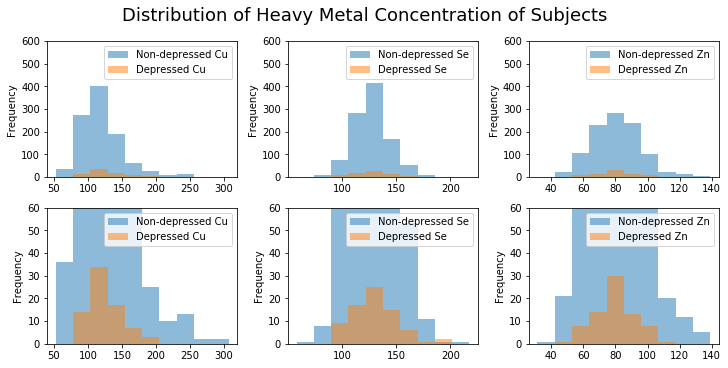

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5), squeeze=False, constrained_layout=True)

pd.merge(dep_n_cu, dep_y_cu, how='outer',left_index=True, right_index=True).plot.hist(ax=axes[0][0], alpha=0.5, ylim=(0, 600))
pd.merge(dep_n_cu, dep_y_cu, how='outer',left_index=True, right_index=True).plot.hist(ax=axes[1][0], alpha=0.5, ylim=(0,60))

pd.merge(dep_n_se, dep_y_se, how='outer',left_index=True, right_index=True).plot.hist(ax=axes[0][1], alpha=0.5, ylim=(0,600))
pd.merge(dep_n_se, dep_y_se, how='outer',left_index=True, right_index=True).plot.hist(ax=axes[1][1], alpha=0.5, ylim=(0,60))

pd.merge(dep_n_zn, dep_y_zn, how='outer',left_index=True, right_index=True).plot.hist(ax=axes[0][2], alpha=0.5, ylim=(0,600))
pd.merge(dep_n_zn, dep_y_zn, how='outer',left_index=True, right_index=True).plot.hist(ax=axes[1][2], alpha=0.5, ylim=(0,60))

fig.suptitle('Distribution of Heavy Metal Concentration of Subjects', fontsize=18)
plt.show()

<p style='text-align: justify;'>Grouped bar chart that compares the different mean heavy metal concentrations between the overall depressed and non-depressed subjects of the study. Depressed subjects seem to have a higher mean of heavy metal concentration for copper and selenium but in zinc the relation is close to similar. No significant difference was found between heavy metal concentrations of depressed and non-depressed subjects.</p>

In [30]:
chart_dep = alt.Chart(dep_t.reset_index()).mark_bar().encode(
    y=alt.Y("Depressed:N",sort="-x", axis=alt.Axis(labels=False, title=None)),
    color=alt.Color("Depressed:N"),
    x=alt.X(alt.repeat("row"), type="quantitative", scale=alt.Scale(domain=(0,150))),
).repeat(
    row=["Serum Cu","Serum Se","Serum Zn"]
)
chart_dep.properties(
    title="Heavy Metal Mean Concentrations in Depressed and Non-depressed Subjects"
)

alt.RepeatChart(...)

<p style='text-align: justify;'>After looking at the mean value of each group, we considered the mean value of the non-depressed group as the normal value. In order to see if age, race, and gender affect metal concentration, we divided each cofounding variable into two or more groups and plotted bar graphs. In addition, the normal value was indicated by a gray horizontal line, making it easier to see which group had higher or lower metal concentration than normal. Also, error bars are plotted on the graph to indicate the range of standard deviations for each bar.</p>

In [31]:
Serum = ['Serum Cu', 'Serum Se', 'Serum Zn']

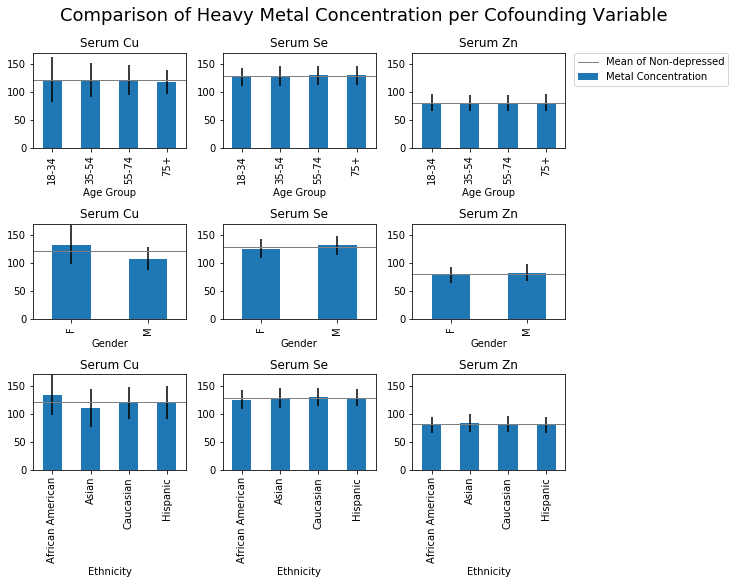

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8), squeeze=False, constrained_layout=True)
for i in range(3):
    d_t.groupby('Age Group').mean().loc[:,Serum[i]].plot.bar(yerr=d_t.groupby('Age Group').describe().loc[:][Serum[i],'std'],
    ax=axes[0][i], title=Serum[i], ylim=(0,170), label='Metal Concentration')
    axes[0][i].axhline(y=dep_n_conc.iloc[0][i], linewidth=1, color='grey', label='Mean of Non-depressed')
    d_t.groupby('Gender').mean().loc[:,Serum[i]].plot.bar(yerr=d_t.groupby('Gender').describe().loc[:][Serum[i],'std'],
    ax=axes[1][i], title=Serum[i], ylim=(0,170))
    axes[1][i].axhline(y=dep_n_conc.iloc[0][i], linewidth=1, color='grey')
    d_t.groupby('Ethnicity').mean().loc[:,Serum[i]].plot.bar(yerr=d_t.groupby('Ethnicity').describe().loc[:][Serum[i],'std'],
    ax=axes[2][i], title=Serum[i], ylim=(0,170))
    axes[2][i].axhline(y=dep_n_conc.iloc[0][i], linewidth=1, color='grey')
axes[0][2].legend(bbox_to_anchor=(2.1, 1.05))
fig.suptitle('Comparison of Heavy Metal Concentration per Cofounding Variable', fontsize=18)
plt.show()

<p style='text-align: justify;'>If you look at the age graph, you can see that all bars represent values similar to normal values. Therefore, we found that age does not affect metal concentrations. And for similar reasons, Se and Zn were not affected by each cofounding variable in ethnicity and gender. In Cu, however, there was a noticeable difference from normal values in race and gender.<br><br>
If heavy metal concentration effects depression, African Americans will have more depressed patients than other races and women will have more depressed patients than men. To verify this assumption, we plotted pie charts for each variable to see the percentage of each group.</p>

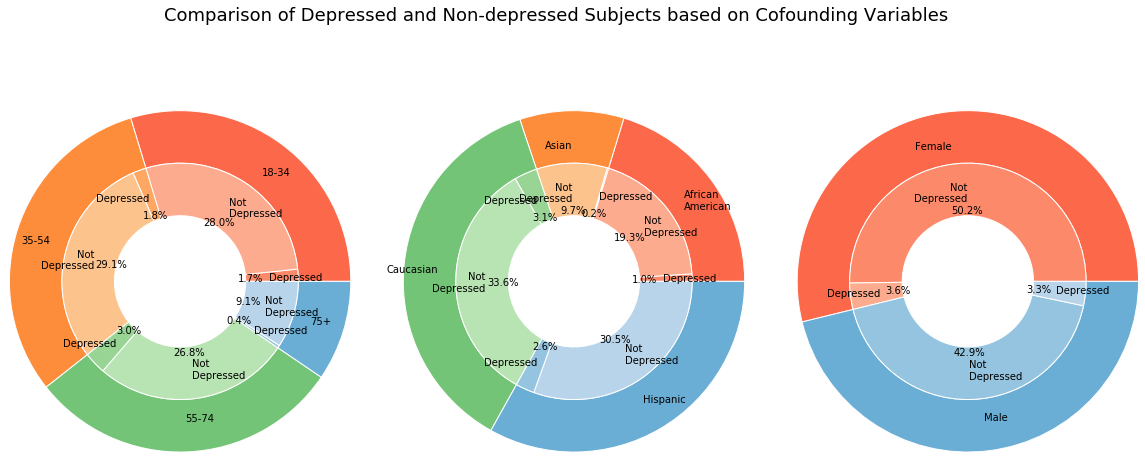

In [33]:
a, b, c, d = [plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues]
width_num = 0.4

# 1st pie chart
group_names = ['18-34', '35-54', '55-74', '75+']
group_sizes = np.array(d_tage.reset_index().groupby('Age Group').sum()['Subjects'])
subgroup_names = ['Depressed', 'Not\nDepressed']*4
subgroup_sizes = np.array(d_tage.reset_index().sort_values(by='Age Group')['Subjects'])

fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

pie_outside, _ = ax[0][0].pie(group_sizes, radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.5), b(0.5), c(0.5), d(0.5)])
plt.setp(pie_outside, width=width_num, edgecolor='white')
pie_inside, plt_labels, junk = \
    ax[0][0].pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, 
                 autopct='%1.1f%%', colors=[a(0.4),a(0.3), b(0.4),b(0.3), c(0.4),c(0.3), d(0.4),d(0.3)])
plt.setp(pie_inside, width=width_num, edgecolor='white')

# 2nd pie chart
group_names = ['African\nAmerican', 'Asian', 'Caucasian', 'Hispanic']
group_sizes = np.array(d_teth.reset_index().groupby('Ethnicity').sum()['Subjects'])
subgroup_sizes = np.array(d_teth.reset_index().sort_values(by='Ethnicity')['Subjects'])

pie_outside, _ = ax[0][1].pie(group_sizes, radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.5), b(0.5), c(0.5), d(0.5)])
plt.setp(pie_outside, width=width_num, edgecolor='white')
pie_inside, plt_labels, junk = \
    ax[0][1].pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, 
                 autopct='%1.1f%%', colors=[a(0.4),a(0.3), b(0.4),b(0.3), c(0.4),c(0.3), d(0.4),d(0.3)])
plt.setp(pie_inside, width=width_num, edgecolor='white')

# 3rd pie chart
group_names = ['Female', 'Male']
group_sizes = np.array(d_tg.reset_index().groupby('Gender').sum()['Subjects'])
subgroup_names = ['Not\nDepressed', 'Depressed']*2
subgroup_sizes = np.array(d_tg.reset_index().sort_values(by='Gender')['Subjects'])

pie_outside, _ = ax[0][2].pie(group_sizes, radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.5), d(0.5)])
plt.setp(pie_outside, width=width_num, edgecolor='white')
pie_inside, plt_labels, junk = \
    ax[0][2].pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, 
                 autopct='%1.1f%%', colors=[a(0.4), a(0.3), d(0.4), d(0.3)])
plt.setp(pie_inside, width=width_num, edgecolor='white')

fig.suptitle('Comparison of Depressed and Non-depressed Subjects based on Cofounding Variables', fontsize=18)
plt.show()

<p style='text-align: justify;'>However, it was difficult to compare the values between different groups because each group had a different percentage of the total. Thus, the values of each group were normalized, making all groups equal in proportions. Therefore, we can now compare the depressed and non-depressed values between different groups.</p>

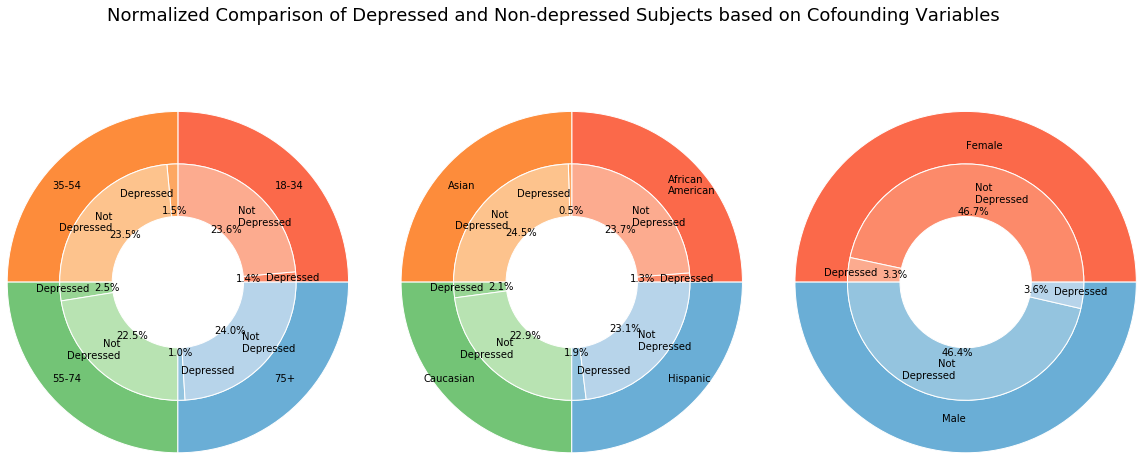

In [34]:
a, b, c, d = [plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues]
width_num = 0.4

# 1st pie chart
group_names = ['18-34', '35-54', '55-74', '75+']
group_sizes = np.array(d_tage.reset_index().groupby('Age Group').sum()['Subjects'])
subgroup_names = ['Depressed', 'Not\nDepressed']*4
subgroup_sizes = np.array(d_tage.reset_index().sort_values(by='Age Group')['Subjects'])

fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

pie_outside, _ = ax[0][0].pie([0.25]*4, radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.5), b(0.5), c(0.5), d(0.5)])
plt.setp(pie_outside, width=width_num, edgecolor='white')
pie_inside, plt_labels, junk = \
    ax[0][0].pie(subgroup_sizes/[group_sizes[x] for x in [0,0,1,1,2,2,3,3]], radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, 
                 autopct='%1.1f%%', colors=[a(0.4),a(0.3), b(0.4),b(0.3), c(0.4),c(0.3), d(0.4),d(0.3)])
plt.setp(pie_inside, width=width_num, edgecolor='white')

# 2nd pie chart
group_names = ['African\nAmerican', 'Asian', 'Caucasian', 'Hispanic']
group_sizes = np.array(d_teth.reset_index().groupby('Ethnicity').sum()['Subjects'])
subgroup_sizes = np.array(d_teth.reset_index().sort_values(by='Ethnicity')['Subjects'])

pie_outside, _ = ax[0][1].pie([0.25]*4, radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.5), b(0.5), c(0.5), d(0.5)])
plt.setp(pie_outside, width=width_num, edgecolor='white')
pie_inside, plt_labels, junk = \
    ax[0][1].pie(subgroup_sizes/[group_sizes[x] for x in [0,0,1,1,2,2,3,3]], radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, 
                 autopct='%1.1f%%', colors=[a(0.4),a(0.3), b(0.4),b(0.3), c(0.4),c(0.3), d(0.4),d(0.3)])
plt.setp(pie_inside, width=width_num, edgecolor='white')

# 3rd pie chart
group_names = ['Female', 'Male']
group_sizes = np.array(d_tg.reset_index().groupby('Gender').sum()['Subjects'])
subgroup_names = ['Not\nDepressed', 'Depressed']*2
subgroup_sizes = np.array(d_tg.reset_index().sort_values(by='Gender')['Subjects'])

pie_outside, _ = ax[0][2].pie([0.5]*2, radius=1.3, labels=group_names, labeldistance=0.8, colors=[a(0.5), d(0.5)])
plt.setp(pie_outside, width=width_num, edgecolor='white')
pie_inside, plt_labels, junk = \
    ax[0][2].pie(subgroup_sizes/[group_sizes[x] for x in [0,0,1,1]], radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, 
                 autopct='%1.1f%%', colors=[a(0.4), a(0.3), d(0.4), d(0.3)])
plt.setp(pie_inside, width=width_num, edgecolor='white')

fig.suptitle('Normalized Comparison of Depressed and Non-depressed Subjects based on Cofounding Variables', fontsize=18)
plt.show()

<p style='text-align: justify;'>The results came out different than what we expected. For example, men had a greater depressed proportion than women, and African Americans had a smaller depressed proportion than Hispanics and Caucasians.</p>

<p style='text-align: justify;'>The purpose of the boxplot visualization was to show the shape of the data's distribution, its central values and its variability between each score of depression amongst the different heavy metal concentrations. Although the median of the boxplots of the different depression in the different heavy metal concentrations are similar or close to similar, the spread of heavy metal concentrations differs between each score. Majority of depression scores showed unusual observations (outliers) amongst the heavy metals that were observed. A trend that was observed was how the number of outliers decreased as the depression score increased--heavy metal concentration is more variable in subjects with low levels of depression than subjects with high levels of depression. The large variability in the dataset and the alignment of most of medians indicate that the chances of finding any significant difference between the different heavy metal concentrations in the different scores of depression is close to none.</p>

In [35]:
chart_s=alt.Chart(cols_interest).mark_boxplot(clip=True).encode(
    x=alt.X('Score:N', title=None),
    color='Score:N',
    shape='Score:N'
)
chart_title=chart_s.encode(y=alt.Y('Serum Cu:Q',scale=alt.Scale(domain=(25,300))))|chart_s.encode(y=alt.Y('Serum Se:Q',scale=alt.Scale(domain=(25,300))))|chart_s.encode(y=alt.Y('Serum Zn:Q',scale=alt.Scale(domain=(25,300))))
chart_title.properties(title="Heavy Metal Concentrations based on Depression Score").configure_title(align="center")


alt.HConcatChart(...)

In [36]:
dep_n_cu = dep_n.iloc[:,[7,11]]
dep_n_cu.rename(columns={'Serum Cu': 'Dep_yes_Cu'}, inplace=True)
dep_y_cu = dep_y.iloc[:,[7,11]]
dep_y_cu.rename(columns={'Serum Cu': 'Dep_no_Cu'}, inplace=True)
dep_y_cu=dep_y_cu.reset_index()
del dep_y_cu['index']; del dep_y_cu['Score']; del dep_n_cu['Score']

In [37]:
dep_n_se = dep_n.iloc[:,[8,11]]
dep_n_se.rename(columns={'Serum Se': 'Dep_yes_Se'}, inplace=True)

dep_y_se = dep_y.iloc[:,[8,11]]
dep_y_se.rename(columns={'Serum Se': 'Dep_no_Se'}, inplace=True)
dep_y_se=dep_y_se.reset_index()
del dep_y_se['index']; del dep_y_se['Score']; del dep_n_se['Score']

In [38]:
dep_n_zn = dep_n.iloc[:,[9,11]]
dep_n_zn.rename(columns={'Serum Zn': 'Dep_yes_Zn'}, inplace=True)

dep_y_zn = dep_y.iloc[:,[9,11]]
dep_y_zn.rename(columns={'Serum Zn': 'Dep_no_Zn'}, inplace=True)
dep_y_zn=dep_y_zn.reset_index()
del dep_y_zn['index']; del dep_y_zn['Score']; del dep_n_zn['Score']

In [39]:
dep_tg=d_t.groupby(['Score','Gender']).mean()
dep_tg.reset_index(drop=False,inplace=True)

In [40]:
dep_tg

,Score,Gender,Subject,Age,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn
0,0,F,88645.072464,47.035197,0.000000,0.000000,0.000000,132.502484,125.133747,78.744306
1,0,M,88657.687345,47.955335,0.000000,0.000000,0.000000,107.130025,131.359305,82.641191
2,1,F,88750.725806,51.145161,0.629032,0.338710,0.032258,130.856452,127.779032,80.448387
3,1,M,89103.241935,51.032258,0.596774,0.354839,0.048387,108.022581,128.766129,80.574194
4,2,F,89208.851852,47.148148,0.962963,1.000000,0.037037,137.655556,128.585185,80.537037
5,2,M,87383.333333,52.727273,0.848485,1.000000,0.151515,115.424242,134.703030,79.400000
6,3,F,88848.500000,53.083333,1.000000,1.000000,1.000000,132.216667,125.900000,78.200000
7,3,M,87881.333333,52.000000,1.000000,1.000000,1.000000,107.600000,136.133333,88.666667


In [41]:
dep_tg

,Score,Gender,Subject,Age,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn
0,0,F,88645.072464,47.035197,0.000000,0.000000,0.000000,132.502484,125.133747,78.744306
1,0,M,88657.687345,47.955335,0.000000,0.000000,0.000000,107.130025,131.359305,82.641191
2,1,F,88750.725806,51.145161,0.629032,0.338710,0.032258,130.856452,127.779032,80.448387
3,1,M,89103.241935,51.032258,0.596774,0.354839,0.048387,108.022581,128.766129,80.574194
4,2,F,89208.851852,47.148148,0.962963,1.000000,0.037037,137.655556,128.585185,80.537037
5,2,M,87383.333333,52.727273,0.848485,1.000000,0.151515,115.424242,134.703030,79.400000
6,3,F,88848.500000,53.083333,1.000000,1.000000,1.000000,132.216667,125.900000,78.200000
7,3,M,87881.333333,52.000000,1.000000,1.000000,1.000000,107.600000,136.133333,88.666667


In [42]:
dep_tg.rename(columns={'variable':'Metal', 'value':'Mean'}, inplace=True)

In [43]:
dep_tg

,Score,Gender,Subject,Age,Anhedonia,Hopelessness,Suicidal Thoughts,Serum Cu,Serum Se,Serum Zn
0,0,F,88645.072464,47.035197,0.000000,0.000000,0.000000,132.502484,125.133747,78.744306
1,0,M,88657.687345,47.955335,0.000000,0.000000,0.000000,107.130025,131.359305,82.641191
2,1,F,88750.725806,51.145161,0.629032,0.338710,0.032258,130.856452,127.779032,80.448387
3,1,M,89103.241935,51.032258,0.596774,0.354839,0.048387,108.022581,128.766129,80.574194
4,2,F,89208.851852,47.148148,0.962963,1.000000,0.037037,137.655556,128.585185,80.537037
5,2,M,87383.333333,52.727273,0.848485,1.000000,0.151515,115.424242,134.703030,79.400000
6,3,F,88848.500000,53.083333,1.000000,1.000000,1.000000,132.216667,125.900000,78.200000
7,3,M,87881.333333,52.000000,1.000000,1.000000,1.000000,107.600000,136.133333,88.666667


<p style='text-align: justify;'>Grouped bar plots that compare the different means of heavy metal concentrations of depressed and non-depressed: females and males. Average male serum copper concentrations in depressed and non-depressed subjects were lower than female serum copper concentrations. Average serum copper and selenium concentrations in depressed subjects were higher than non-depressed subjects except for zinc concentrations where non-depressed subjects had a higher average than depressed subjects. Due to the difference in sample sizes, there is unequal variance which effects the reliability of any stastical analysis. No significant difference was found (or able to be proven) amongst the mean heavy metal concentrations of the different genders (male and female) in depressed and non-depressed subjects.</p>

In [52]:
chart_scoreg=alt.Chart(d_tg.reset_index()).mark_bar().encode(  
    x=alt.X('Depressed:N',sort='x', axis=alt.Axis(labels=False, title=None)),
    color='Depressed:N',
    column='Gender:N',)
scoreg_title=chart_scoreg.encode(y=alt.Y('Serum Cu:Q',scale=alt.Scale(domain=(0,140))))|chart_scoreg.encode(y=alt.Y('Serum Se:Q',scale=alt.Scale(domain=(0,140))))|chart_scoreg.encode(y=alt.Y('Serum Zn:Q',scale=alt.Scale(domain=(0,140))))
scoreg_title.properties(title='Heavy Metal Mean Concentrations in Depressed and Non-depressed Subjects based on Gender')

alt.HConcatChart(...)

<p style='text-align: justify;'>Grouped bar plots that compare the different mean heavy metal concentrations amongst the different depression scores in females and males. In serum copper concentrations, females and males with a depression score of 2 had the highest means. In serum selenium concentrations, females wtih a depression score of 2 and males with a depression score of 3 had the highest means. In serum zinc concentrations, males with a depression score of 3 had the highest means. Due to the difference in sample sizes, there is unequal variance which effects the reliability of any stastical analysis. No significant difference was found (or able to be proven) amongst the mean heavy metal concentrations of the different genders (male and female) of depression scores from 0 to 3.</p>

In [45]:
chart_scoreg=alt.Chart(dep_tg).mark_bar().encode(  
    x=alt.X('Score:N',sort='x',axis=alt.Axis(labels=False,title=None)),
    color='Score:N',
    column='Gender:N'
)
chart_scoreg2_title=chart_scoreg.encode(y=alt.Y('Serum Cu:Q',scale=alt.Scale(domain=(0,140))))&chart_scoreg.encode(y=alt.Y('Serum Se:Q',scale=alt.Scale(domain=(0,140))))&chart_scoreg.encode(y=alt.Y('Serum Zn:Q',scale=alt.Scale(domain=(0,140))))
chart_scoreg2_title.properties(title='Heavy Metal Mean Concentrations per Depression Score based on Gender')

alt.VConcatChart(...)

In [46]:
dep_te=d_t.groupby(['Score','Ethnicity']).mean()
dep_te.reset_index(drop=False,inplace=True)

<p style='text-align: justify;'>Grouped bar plots that compare the different means of heavy metal concentrations of depressed and non-depressed: African Americans, Asians, Caucasians and Hispanics. In serum copper and selenium concentrations, depressed subjects of all ethnicities had a higher mean than non-depressed ethnicities. In serum zinc concentrations, non-depressed Caucasians and Hispanics had a higher mean concentration than their equalative depressed subject group. Asians had the overall lowest mean concentrations of serum copper out of all the other heavy metals. Due to the difference in sample sizes, there is unequal variance which effects the reliability of any stastical analysis. No significant difference was found (or able to be proven) amongst the mean heavy metal concentrations of the different ethnicities that were categorized as depressed and non-depressed.</p>

In [47]:
chart_scoree=alt.Chart(d_teth.reset_index()).mark_bar().encode(  
    x=alt.X('Depressed:N',sort='x', axis=alt.Axis(labels=False, title=None)),
    color='Depressed:N',
    column='Ethnicity:N',)
scoree_title=chart_scoree.encode(y=alt.Y('Serum Cu:Q',scale=alt.Scale(domain=(0,140))))&chart_scoree.encode(y=alt.Y('Serum Se:Q',scale=alt.Scale(domain=(0,140))))&chart_scoree.encode(y=alt.Y('Serum Zn:Q',scale=alt.Scale(domain=(0,140))))
scoree_title.properties(title='Heavy Metal Mean Concentrations in Depressed and Non-depressed Subjects based on Ethnicity')

alt.VConcatChart(...)

<p style='text-align: justify;'>Grouped bar plots that compare the different mean heavy metal concentrations amongst the different depression scores in African Americans, Asians, Caucasians,  and Hispanics. In serum copper concentrations, African Americans and Caucasians with a depression score of 3 had the highest means; Asians had the lowest concentrations of serum copper in all the depression scores and African Americans had the highest. In serum selenium concentrations, African Americans with a score of 3 had the highest mean whereas for Asians the highest mean came from subjects with a depression score of 1--same observations where found in the serum zinc concentrations. In each heavy metal concetration, Hispanics with a depression score of 3 had the lowest means. Due to the difference in sample sizes, there is unequal variance which effects the reliability of any stastical analysis. No significant difference was found (or able to be proven) amongst the mean heavy metal concentrations of the different ethnicities with depression scores from 0 to 3.</p>

In [48]:
chart_scoree=alt.Chart(dep_te).mark_bar().encode(  
    x=alt.X('Score:N',sort='x', axis=alt.Axis(labels=False, title=None)),
    color='Score:N',
    column='Ethnicity:N'
)
chart_scoree_title=chart_scoree.encode(y=alt.Y('Serum Cu:Q',scale=alt.Scale(domain=(0,160)),sort='-y'))& chart_scoree.encode(y=alt.Y('Serum Se:Q',scale=alt.Scale(domain=(0,160)),sort='-y'))& chart_scoree.encode(y=alt.Y('Serum Zn:Q',scale=alt.Scale(domain=(0,160)),sort='-y'))
chart_scoree_title.properties(title='Heavy Metal Mean Concentrations per Depression Score based on Ethnicity')

alt.VConcatChart(...)

In [49]:
dep_ta=d_t.groupby(['Score','Age Group']).mean()
dep_ta.reset_index(drop=False,inplace=True)

<p style='text-align: justify;'>Grouped bar plots that compare the different means of heavy metal concentrations of depressed and non-depressed age groups. Common trend where mean concentrations of heavy metals increase in depressed subjects besides the 75+ age group where non-depressed have a higher mean than non-depressed or both are equal, in copper and selenium concentrations. No common trend was observed in the serum zinc concentrations. Due to the difference in sample sizes, there is unequal variance which effects the reliability of any stastical analysis. No significant difference was found (or able to be proven) amongst the mean heavy metal concentrations of the different age groups that were categorized as depressed and non-depressed.</p>

In [50]:
chart_scorea=alt.Chart(d_tage.reset_index()).mark_bar().encode(  
    x=alt.X('Depressed:N',sort='x', axis=alt.Axis(labels=False, title=None)),
    color='Depressed:N',
    column='Age Group:N',)
scorea_title=chart_scorea.encode(y=alt.Y('Serum Cu:Q',scale=alt.Scale(domain=(0,140))))&chart_scorea.encode(y=alt.Y('Serum Se:Q',scale=alt.Scale(domain=(0,140))))&chart_scorea.encode(y=alt.Y('Serum Zn:Q',scale=alt.Scale(domain=(0,140))))
scorea_title.properties(title='Heavy Metal Mean Concentrations in Depressed and Non-depressed Subjects based on Age Group')

alt.VConcatChart(...)

<p style='text-align: justify;'>Grouped bar plots that compare the different mean heavy metal concentrations amongst the different depression scores in the different age groups of interest.In the 55-74 age group, mean concentrations decrease as the depression score increase but around a score of 2 or 3 it begins to increase. The mean concentrations 18-34 age group seem to increase at low scores but decrease at high scores of depression (specifically in selenium and zinc concentrations). The mean concentrations of the 35-54 age group increase as the score increases except in selenium concentrations where it concentration decreases.The mean concentrations in the 75+ age group have a similar trend as the 55-74 age group, except for copper concentrations. Due to the difference in sample sizes, there is unequal variance which effects the reliability of any stastical analysis. No significant difference was found (or able to be proven) amongst the mean heavy metal concentrations of the different ethnicities with depression scores from 0 to 3.</p>

In [51]:
chart_scorea=alt.Chart(dep_ta).mark_bar().encode(  
    x=alt.X('Score:N',sort='x', title=None),
    color='Score:N',
    column='Age Group:N'
)
chart_scorea_title=chart_scorea.encode(y=alt.Y('Serum Cu:Q',scale=alt.Scale(domain=(0,160)),sort='-y'))& chart_scorea.encode(y=alt.Y('Serum Se:Q',scale=alt.Scale(domain=(0,160)),sort='-y'))&chart_scorea.encode(y=alt.Y('Serum Zn:Q',scale=alt.Scale(domain=(0,160)),sort='-y'))
chart_scorea_title.properties(title='Heavy Metal Mean Concentrations per Depression Score based on Age Group')

alt.VConcatChart(...)

<p style='text-align: justify;'>In conclusion</p>